In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
#extracting stock data using pandas datareader
tech_list = ['BSX', 'RTX', 'MPGSX','TMO','GE','EIX','TJX','JHI']

import yfinance as yf
import pandas_datareader.data as pdr

yf.pdr_override()

start_date = "01-01-2018"
end_date = "11-19-2021"

start = datetime.strptime(start_date, '%m-%d-%Y')
end = datetime.strptime(end_date, '%m-%d-%Y')
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [BSX, RTX, MPGSX,TMO,GE,EIX,TJX,JHI]
company_name = ['BSX', 'RTX', 'MPGSX','TMO','GE','EIX','TJX','JHI']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-11-05,18.660000,18.740000,18.590000,18.740000,18.351282,21600,JHI
2021-11-08,18.700001,18.780001,18.700001,18.780001,18.390453,6000,JHI
2021-11-09,18.799999,18.830000,18.780001,18.820000,18.429623,13700,JHI
2021-11-10,18.850000,18.850000,18.790001,18.830000,18.439415,10500,JHI
2021-11-11,18.860001,18.860001,18.799999,18.830000,18.439415,9200,JHI
2021-11-12,18.820000,18.879999,18.790001,18.830000,18.439415,9800,JHI
2021-11-15,18.799999,18.860001,18.750000,18.830000,18.439415,12400,JHI
2021-11-16,18.790001,18.820000,18.740000,18.770000,18.380659,32800,JHI
2021-11-17,18.770000,18.830000,18.680000,18.820000,18.429623,21100,JHI


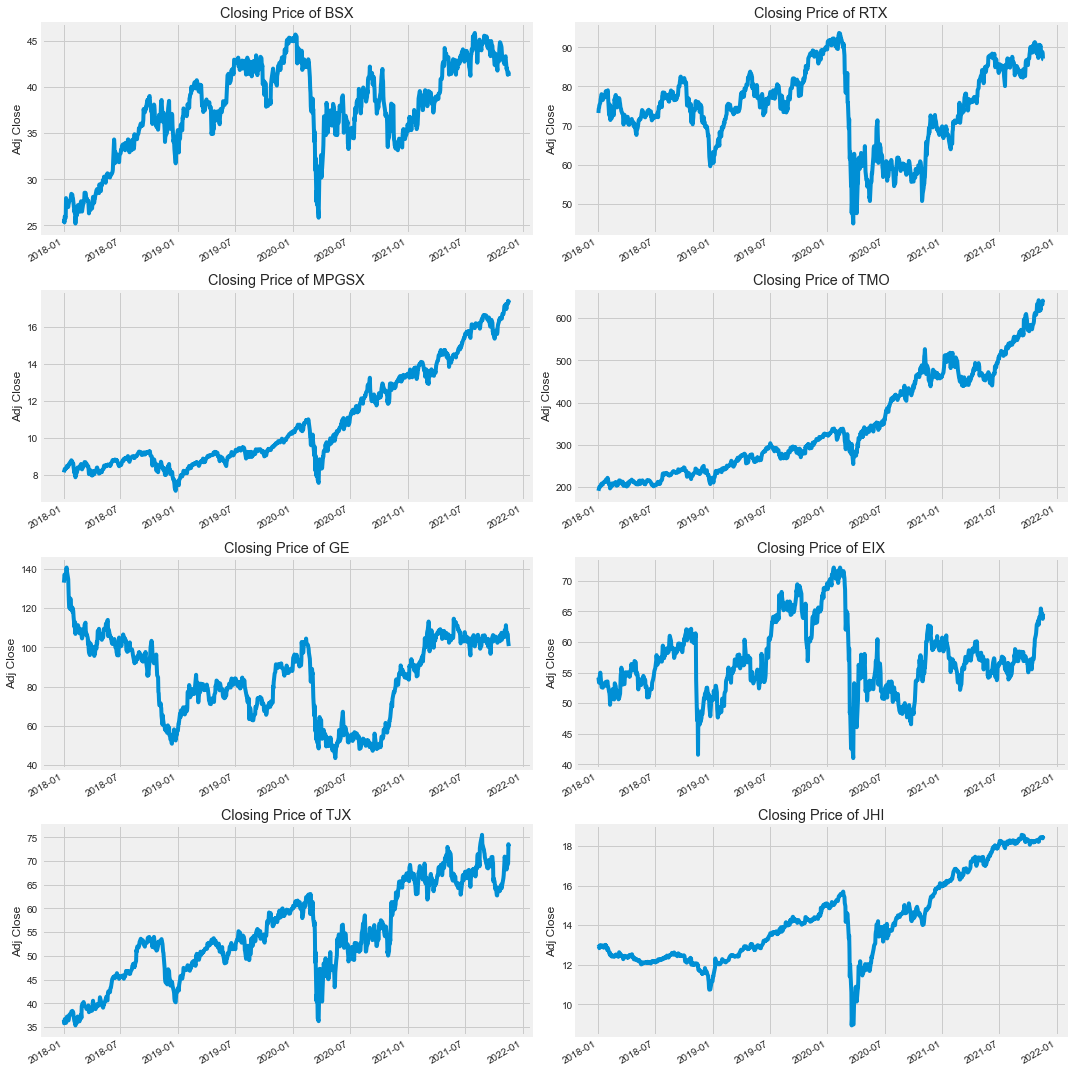

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
#creating a moving average to get the overall trend of the stock
ma_day = [9, 21, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

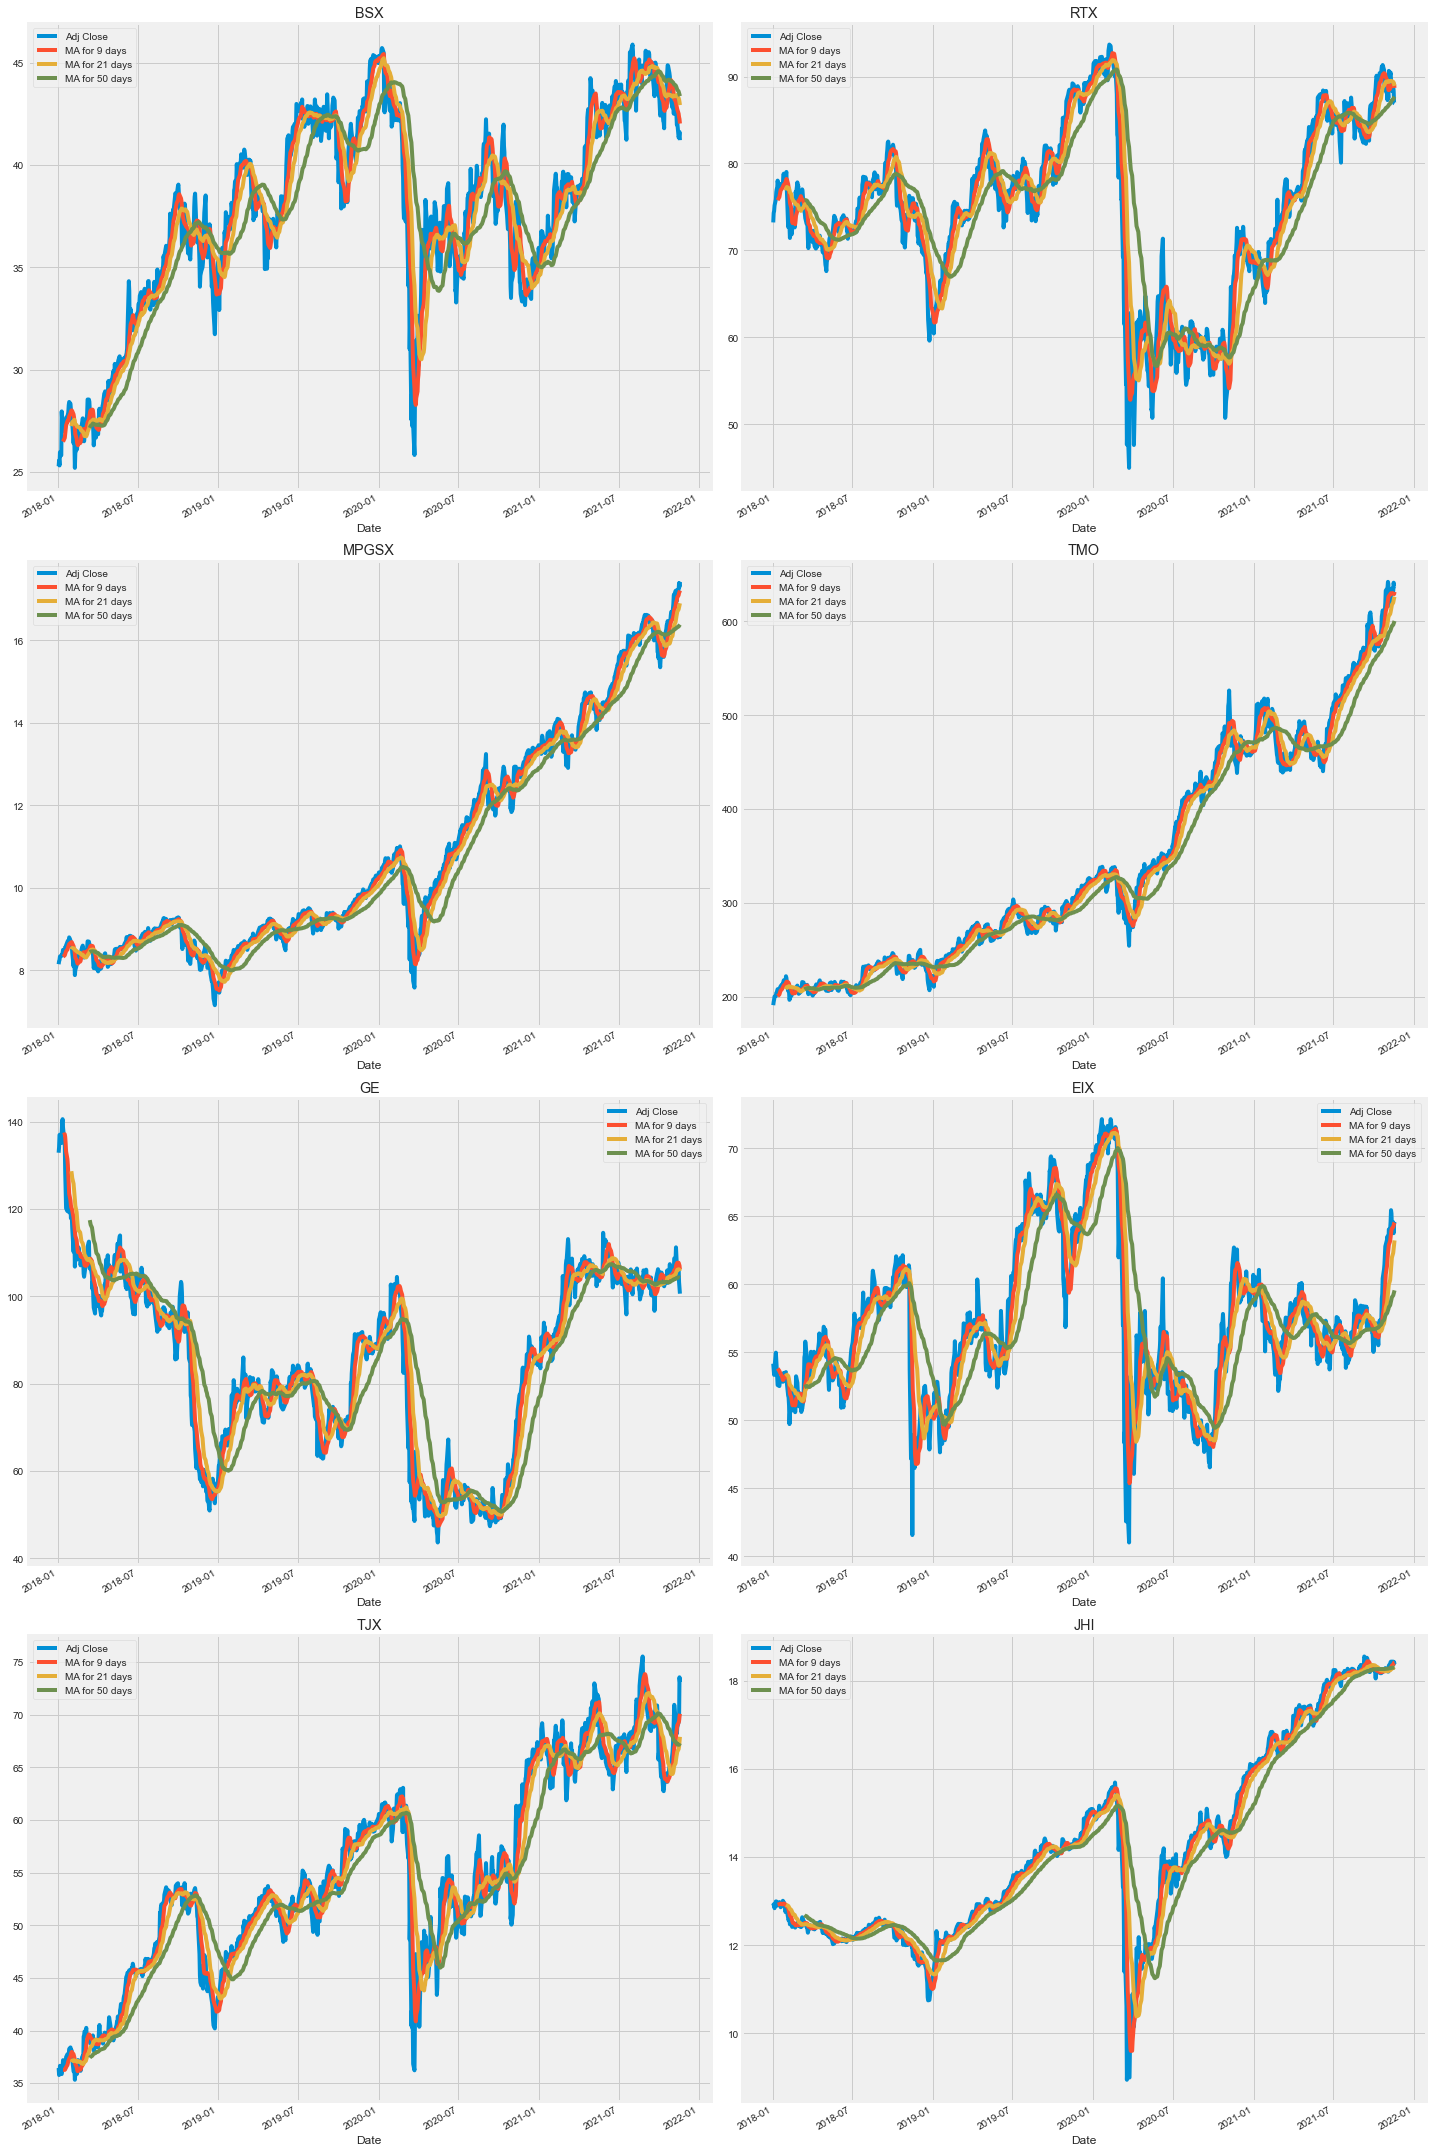

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(20)


BSX[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BSX')

RTX[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('RTX')

MPGSX[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("MPGSX")

TMO[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("TMO")

GE[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title("GE")

EIX[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title("EIX")

TJX[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title("TJX")

JHI[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_title("JHI")

fig.tight_layout()

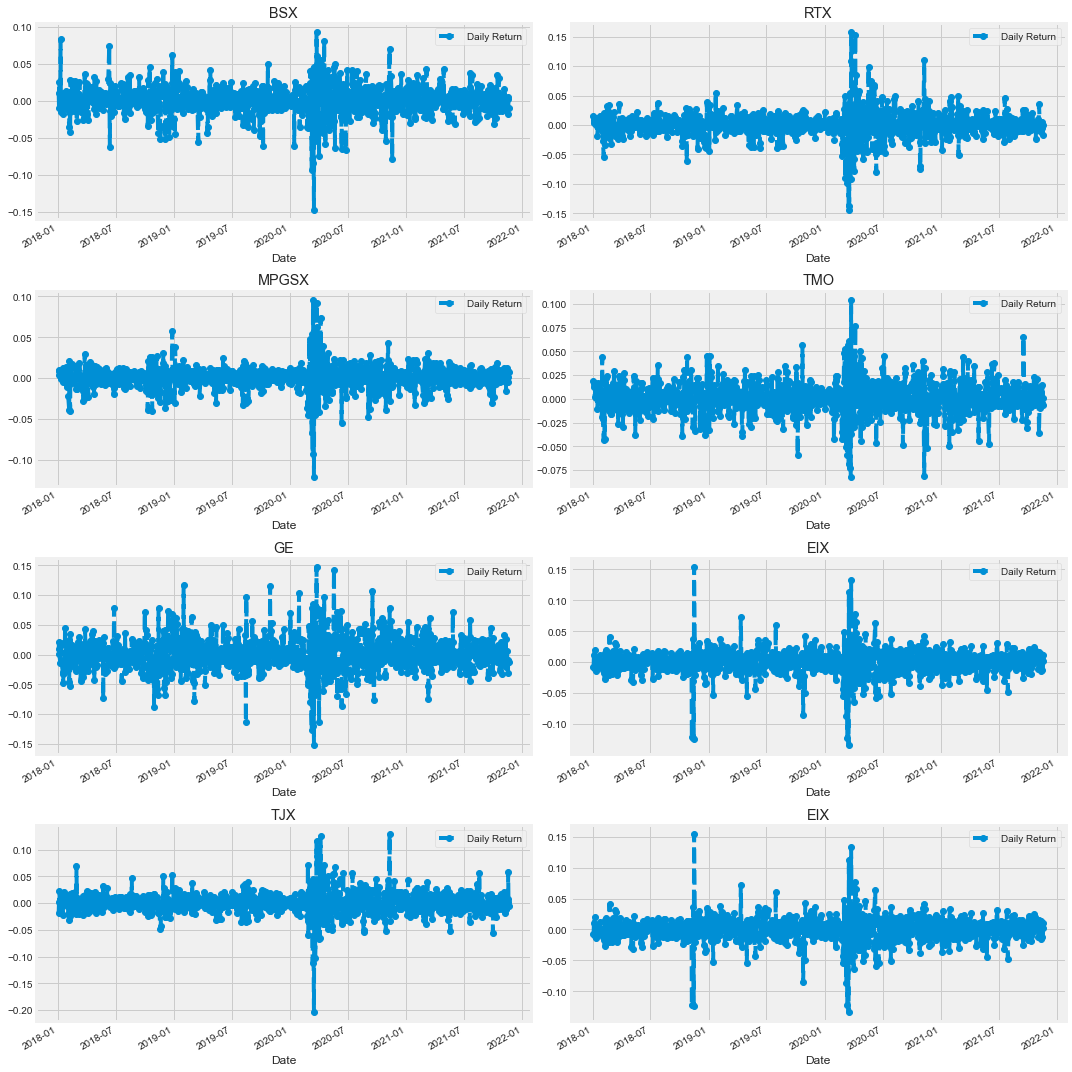

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

BSX['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('BSX')

RTX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('RTX')

MPGSX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MPGSX')

TMO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TMO')

GE['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('GE')

EIX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('EIX')

TJX['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title('TJX')

EIX['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='--', marker='o')
axes[3,1].set_title('EIX')


fig.tight_layout()

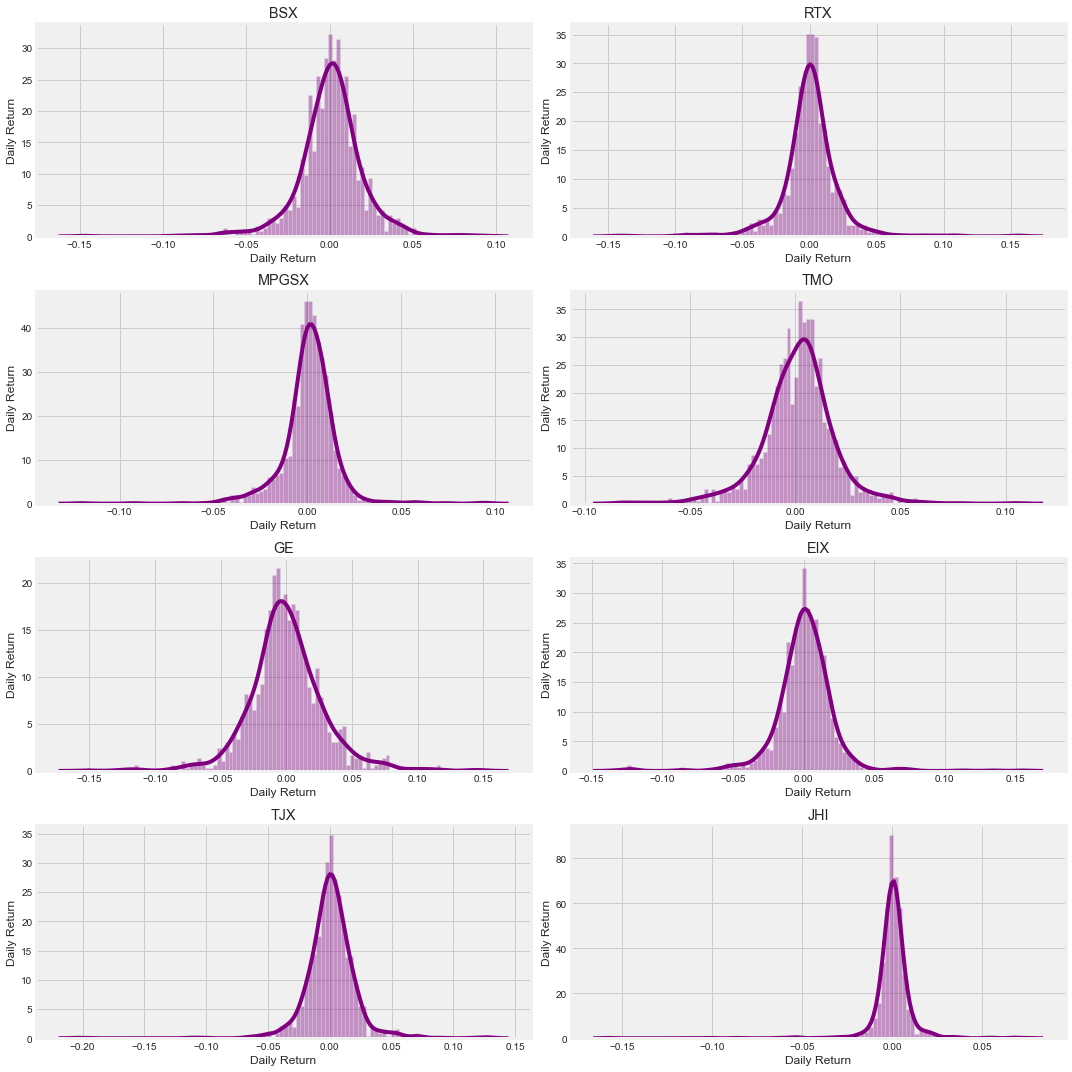

In [11]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(15, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#TMO['Daily Return'].hist()
plt.tight_layout()

In [12]:
import yfinance as yf
import pandas_datareader.data as pdr

yf.pdr_override()

# Grab all the closing prices for Boston stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, data_source='yahoo', start=start, end=end)['Adj Close']
# Let's take a quick look
closing_df

[*********************100%***********************]  8 of 8 completed


,BSX,EIX,GE,JHI,MPGSX,RTX,TJX,TMO
Date,,,,,,,,
2018-01-02,25.280001,54.171230,132.863464,12.898996,8.150966,73.218292,36.429718,191.056107
2018-01-03,25.559999,53.743008,134.119675,12.928309,8.221844,74.292336,35.774174,194.560822
2018-01-04,25.320000,53.349022,136.927719,12.884337,8.254061,74.526566,35.831177,196.996277
2018-01-05,25.969999,53.939983,137.001602,12.840364,8.337826,75.166435,36.648220,200.372314
2018-01-08,25.809999,54.984859,135.080322,12.994269,8.357157,75.880547,35.935684,200.699020
...,...,...,...,...,...,...,...,...
2021-11-12,42.070000,64.239998,107.495872,18.439415,17.209999,88.341782,68.800003,634.994324
2021-11-15,41.340000,64.580002,106.576683,18.439415,17.230000,88.828918,69.320000,632.105469
2021-11-16,41.419998,63.770000,103.259583,18.380659,17.389999,88.381546,69.500000,641.221802


In [13]:
stock_growth = closing_df.iloc[[0, -1]]
stock_growth = stock_growth.pct_change()*100
stock_growth = stock_growth.iloc[[-1]]
stock_growth.reset_index(drop=True, inplace=True)
stock_growth

,BSX,EIX,GE,JHI,MPGSX,RTX,TJX,TMO
0,63.014232,19.251488,-24.296771,42.496816,113.717009,18.699851,100.660347,233.605361


In [14]:
# Make a new returns DataFrame based on percentage changes for each day
tech_rets = closing_df.pct_change()
tech_rets.head()

,BSX,EIX,GE,JHI,MPGSX,RTX,TJX,TMO
Date,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.011076,-0.007905,0.009455,0.002273,0.008696,0.014669,-0.017995,0.018344
2018-01-04,-0.009390,-0.007331,0.020937,-0.003401,0.003918,0.003153,0.001593,0.012518
2018-01-05,0.025671,0.011077,0.000540,-0.003413,0.010148,0.008586,0.022803,0.017138
2018-01-08,-0.006161,0.019371,-0.014024,0.011986,0.002318,0.009500,-0.019443,0.001630


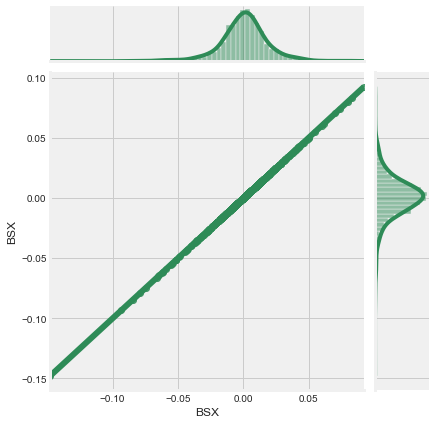

In [23]:
# Comparing BSX to itself should show a perfectly linear relationship
sns.jointplot('BSX', 'BSX', tech_rets, kind='reg', color='seagreen')

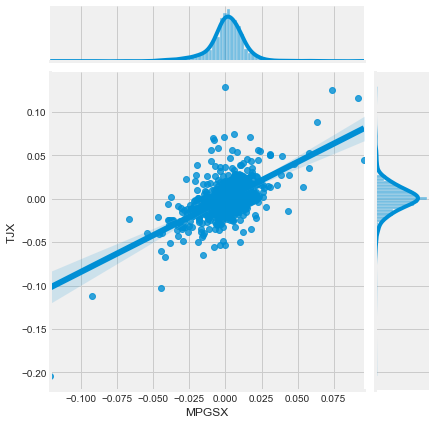

In [16]:
# We'll use joinplot to compare the daily returns of MPGSX and TJX to get the correlation between them
sns.jointplot('MPGSX', 'TJX', tech_rets, kind='reg')

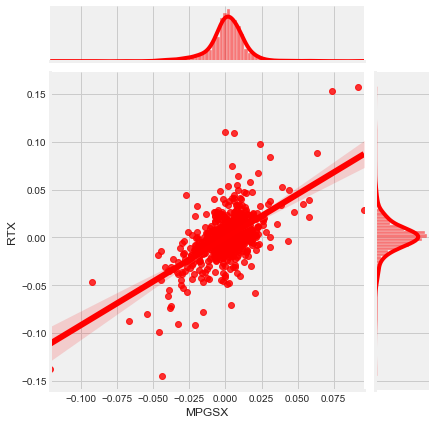

In [17]:
# We'll use joinplot to compare the daily returns of MPGSX and RTX to get the correlation between them
sns.jointplot('MPGSX', 'RTX', tech_rets, kind='reg', color='red')

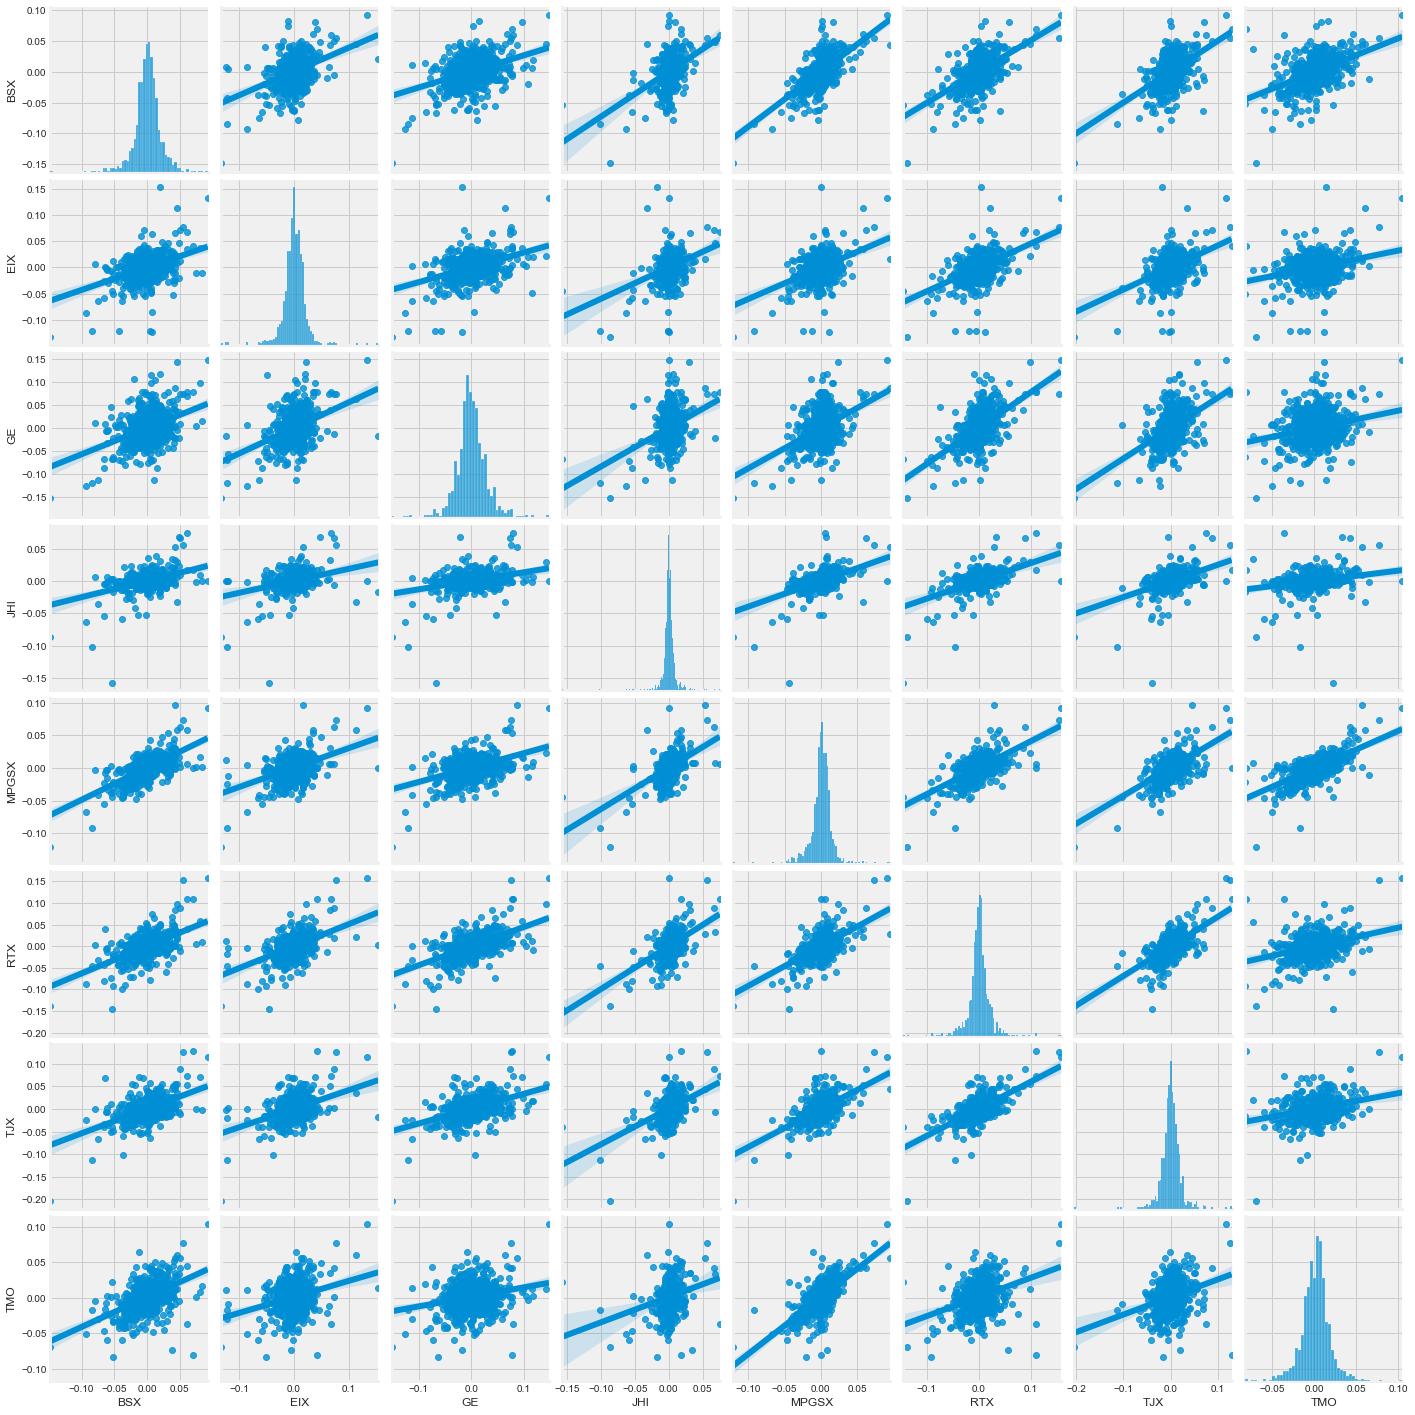

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

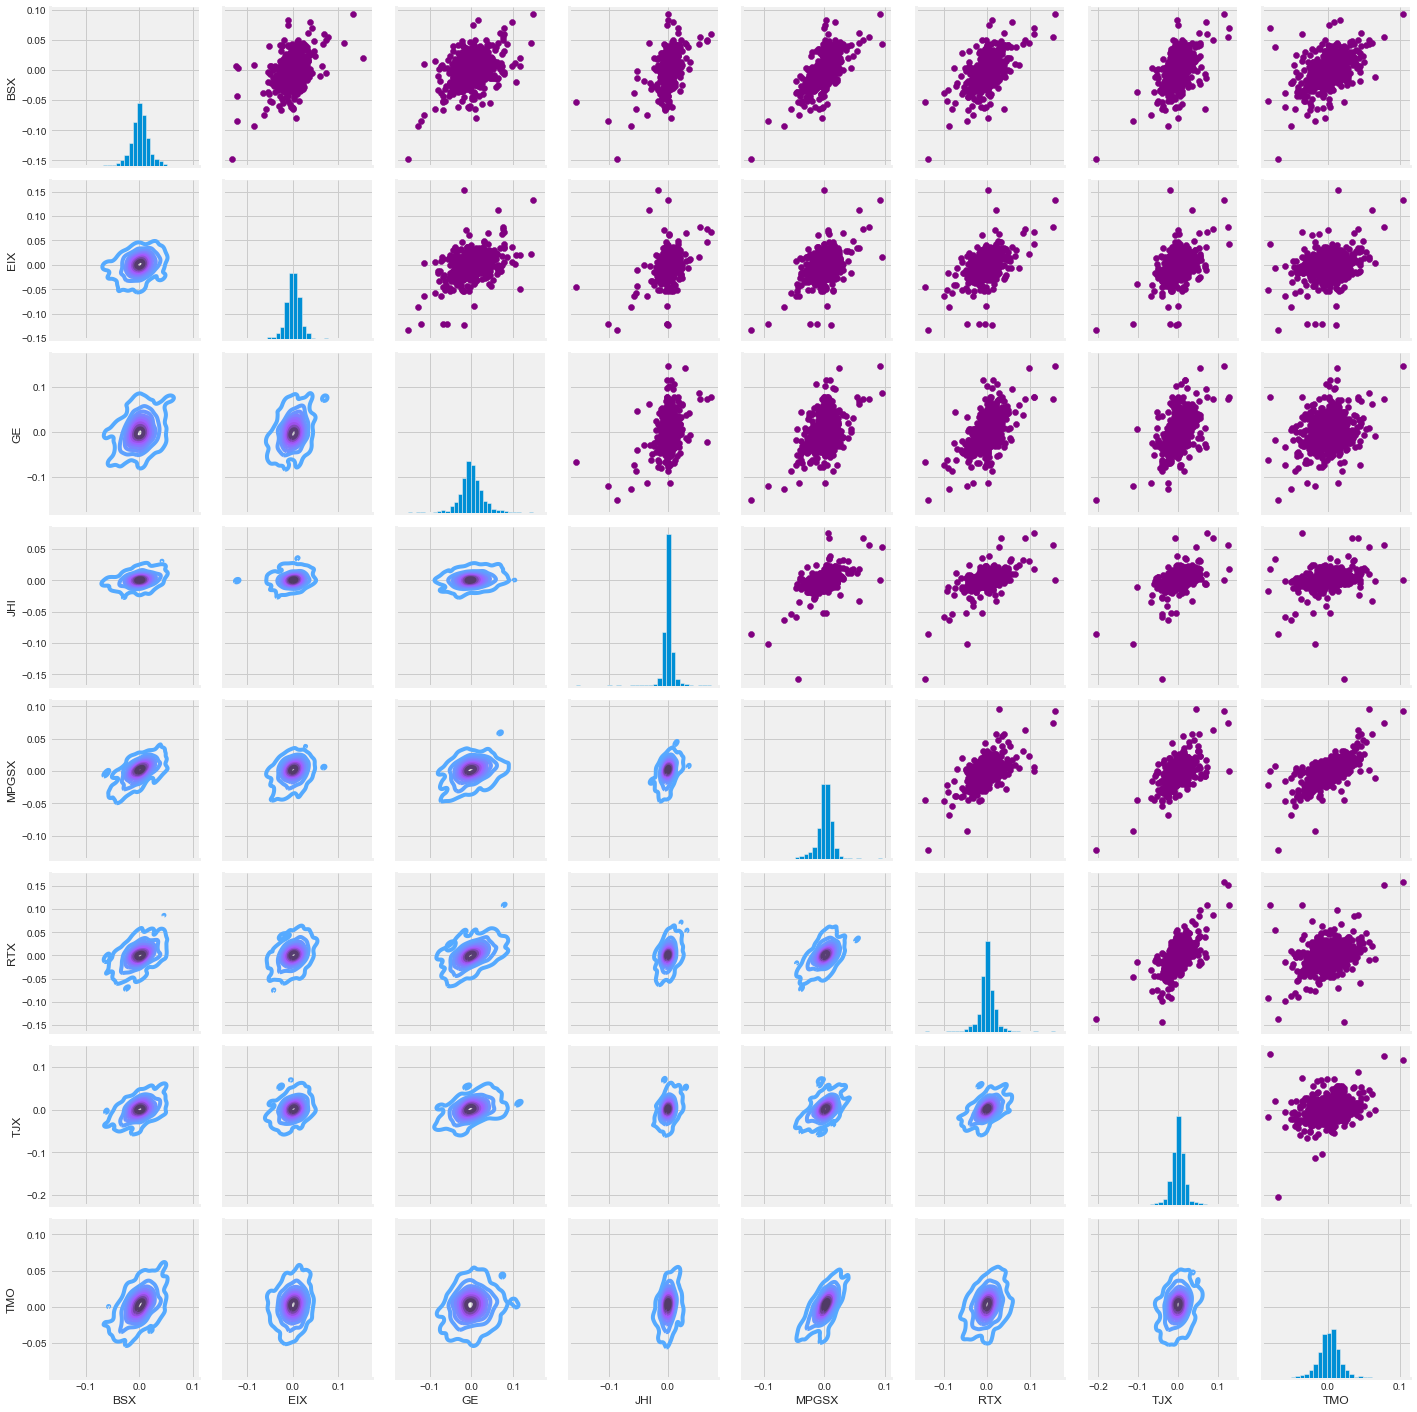

In [19]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:>

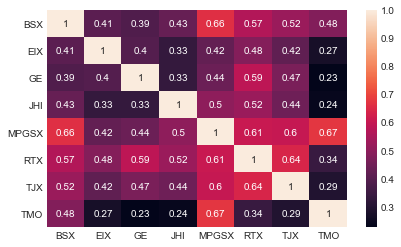

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='rocket')

<AxesSubplot:>

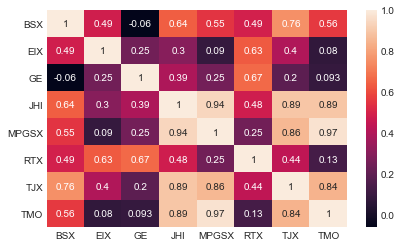

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='rocket')

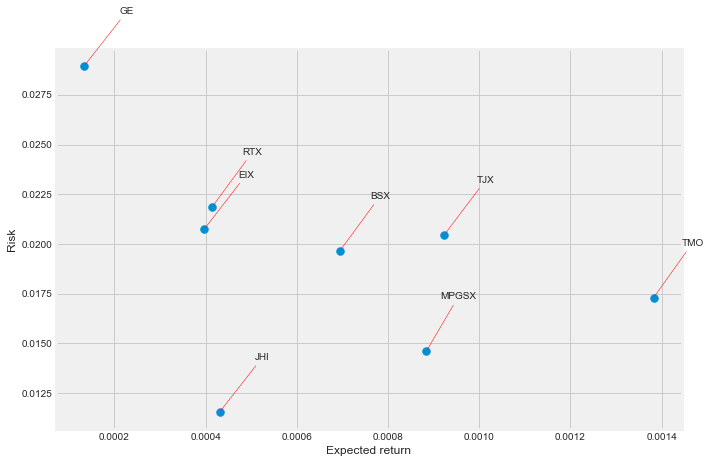

In [22]:
# graph giving the return to risk graph of various stocks considered
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='red'))